### Import all LIbraries

In [5]:
import numpy as np # library to handle data in a vectorized manner

#all state 60622
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import xml.etree.ElementTree as et 

print('Libraries imported.')

Libraries imported.


### Github link to the csv files :
- ZIP : https://github.com/sreeks23/github-example/blob/master/chicagozipcode.csv
- Rent : https://github.com/sreeks23/github-example/blob/master/chicagohouserent.csv
- School : https://github.com/sreeks23/github-example/blob/master/schoolsfinal.csv

### Import zip code file

In [6]:
dfZipr=pd.read_csv('chicagozipcode.csv',encoding='utf-8')
dfZipr['lattitude'] = pd.to_numeric(dfZipr['Lattitude'])
dfZipr['longitude'] = pd.to_numeric(dfZipr['Longitude'])
#dfZipr['postalcode'] = dfZipr['postalcode'].astype(object)
dfZipr.head()

,postalcode,State,City,USCounty,Lattitude,Longitude,lattitude,longitude
0,60601,Chicago,IL,Cook,41.885,-87.626,41.885,-87.626
1,60602,Chicago,IL,Cook,41.882,-87.624,41.882,-87.624
2,60603,Chicago,IL,Cook,41.880,-87.629,41.880,-87.629
3,60604,Chicago,IL,Cook,41.876,-87.626,41.876,-87.626
4,60605,Chicago,IL,Cook,41.866,-87.627,41.866,-87.627


### Import School details file

In [7]:
dfSchool=pd.read_csv('schoolsfinal.csv',encoding='cp1252')
dfSchool.head()

,Name,Grade Category,Grade,Rating,Address,State,City,postalcode
0,ACERO - BRIGHTON PARKÂ,ES,K-8,Level 1,4420 S Fairfield AveÂ,IL,Chicago,60632
1,ACERO - CISNEROSÂ,ES,K-8,Level 1+,2744 W Pershing RdÂ,IL,Chicago,60632
2,ACERO - CLEMENTEÂ,ES,K-8,Level 1,2050 N Natchez AveÂ,IL,Chicago,60707
3,ACERO - DE LA CRUZÂ,ES,K-12,Level 1,7416 N Ridge AveÂ,IL,Chicago,60645
4,ACERO - DE LAS CASASÂ,ES,K-8,Level 1,1641 W 16th StÂ,IL,Chicago,60608


#### Filter out all the school which are not having a good rating and analyze schools distribution by each zip. 

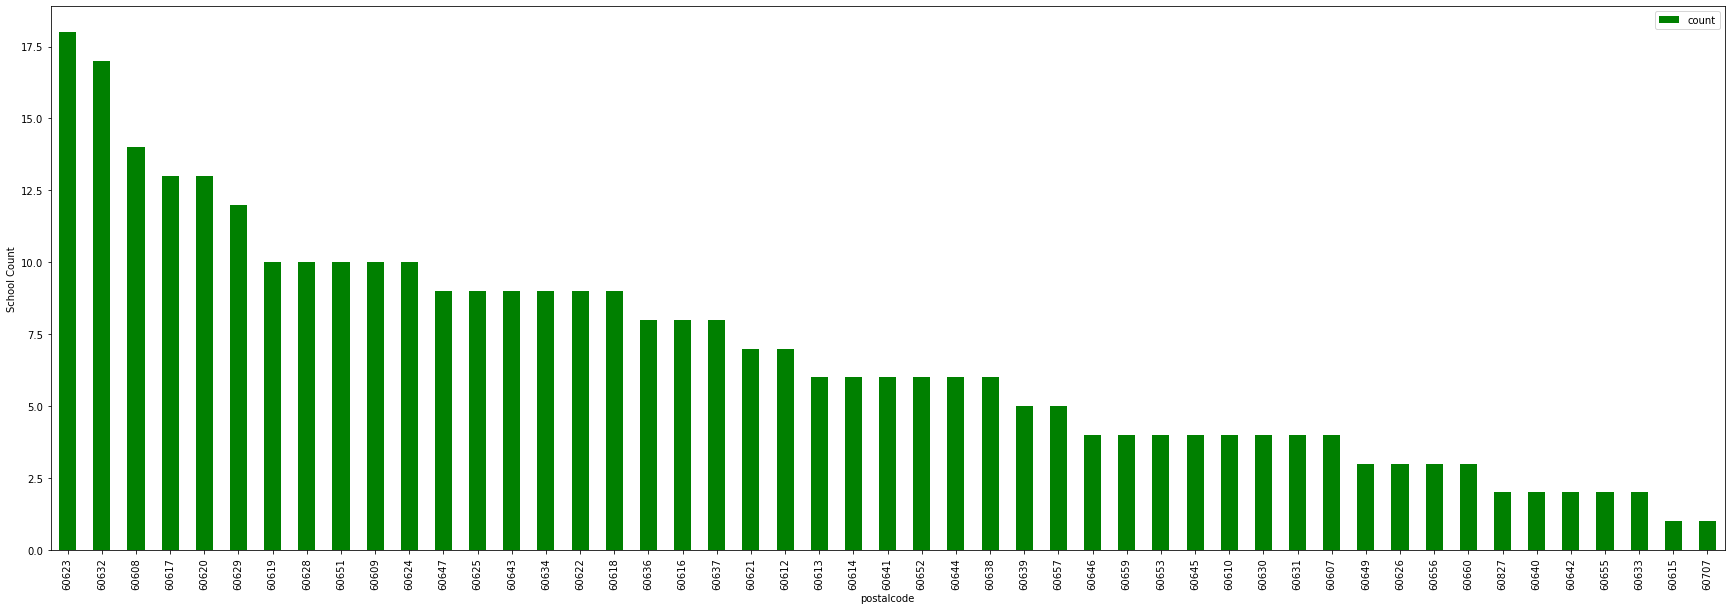

In [9]:
dfSchoolG=dfSchool[dfSchool['Rating'].isin(['Level 1','Level 1+','Level 2']) & dfSchool['Grade'].isin(['PK,K-8','K-8','PK,K-5','PK,K-6','PK,K-4','PK,3-8','K-1,5-8','K-5','PK,K-3','PE,PK,K-8','K-3,5-8','PK,K-7']) ]
dfSchoolG.head()
dfSchoolcount=(dfSchoolG['postalcode'].value_counts()).rename_axis('postalcode').to_frame('count').reset_index()
dfSchoolcount.head()
dfSchoolcount.plot(kind='bar',x='postalcode',y='count',color='g')
plt.rcParams["figure.figsize"] = [30, 10]
plt.ylabel('School Count')
plt.show()

### Import Rent details file

In [48]:
dfRent=pd.read_csv('chicagohouserent.csv')
dfRent.head()


,postalcode,State,Metro,County,City,Zri
0,60657,IL,Chicago-Naperville-Elgin,Cook County,Chicago,1903
1,60614,IL,Chicago-Naperville-Elgin,Cook County,Chicago,2158
2,60640,IL,Chicago-Naperville-Elgin,Cook County,Chicago,1609
3,60647,IL,Chicago-Naperville-Elgin,Cook County,Chicago,1850
4,60618,IL,Chicago-Naperville-Elgin,Cook County,Chicago,1890


#### Analyze average rent details each zip. From the graph below it seems like there is a significant impact on rent values depending on the zip code

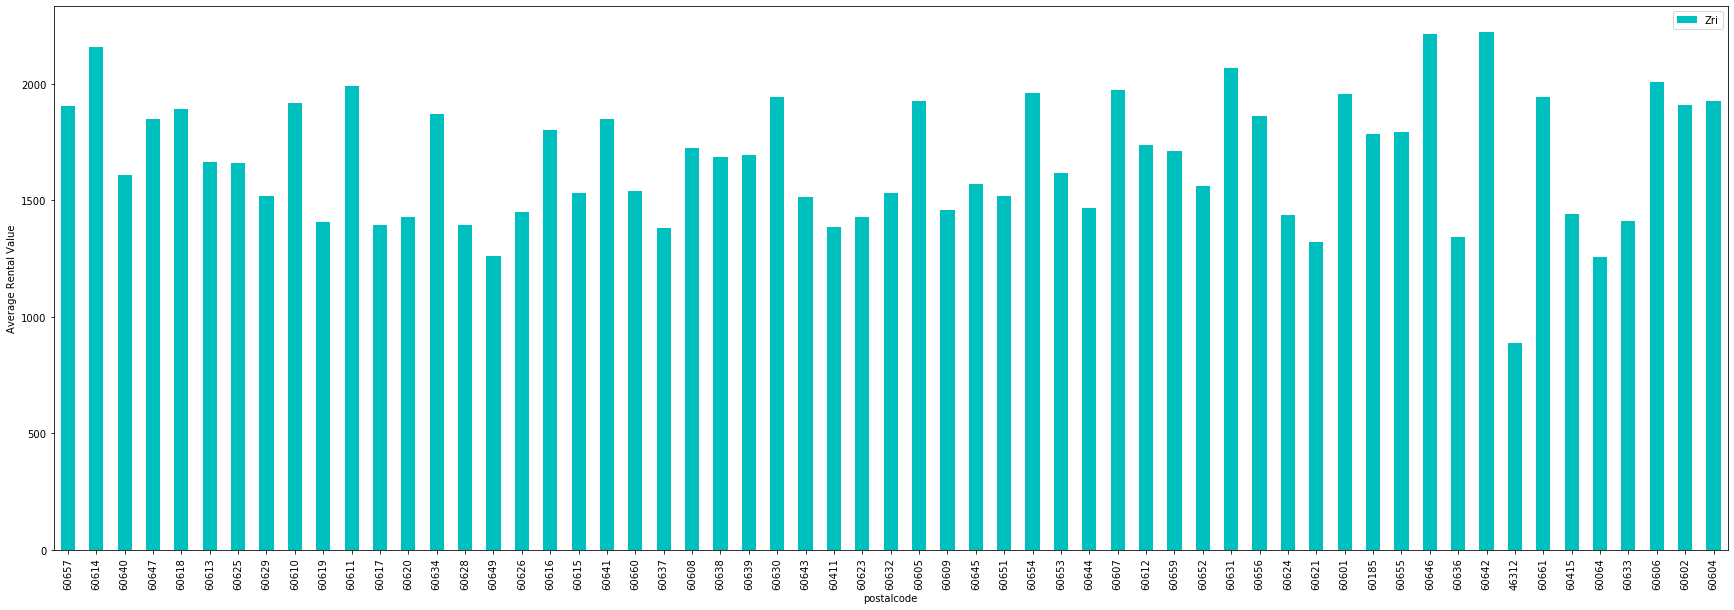

In [11]:
dfRent.plot(kind='bar',x='postalcode',y='Zri',color='c')
plt.rcParams["figure.figsize"] = [30, 10]
plt.ylabel('Average Rental Value')
plt.show()

#### With an assumption that the work location would be in zip code 60622, calculate travel duration to each zip code from work location using google maps api

In [50]:
tratime=[]
gurl ='https://maps.googleapis.com/maps/api/distancematrix/json?'
api_key=''
originlatt=str(dfZipr.loc[dfZipr['postalcode']==60622,'lattitude'].values[0])
originlong=str(dfZipr.loc[dfZipr['postalcode']==60622,'longitude'].values[0])
origins=originlatt+','+originlong
for i, row in dfZipr.iterrows():
    details=[]
    destlatt=str(row['lattitude'])
    destlong=str(row['longitude']) 
    dest=destlatt+','+destlong
    r = requests.get(gurl + 'units=imperial&'+'origins=' + origins + '&destinations=' + dest +'&key=' + api_key).json()
    details.append(r['rows'][0]['elements'][0]['duration']['value']) 
    details.append(row['postalcode'])
    tratime.append(details)    

dftime=pd.DataFrame(tratime)
columns=['duration','postalcode']
dftime.columns=columns
dftime.head()

,duration,postalcode
0,867,60601
1,921,60602
2,880,60603
3,1054,60604
4,1029,60605


#### Analyze travel duration for each zip code by plotting a bar graph.
- The lowest travel duration is to zip code 60699
- The longest travel duration is to zip code 60803

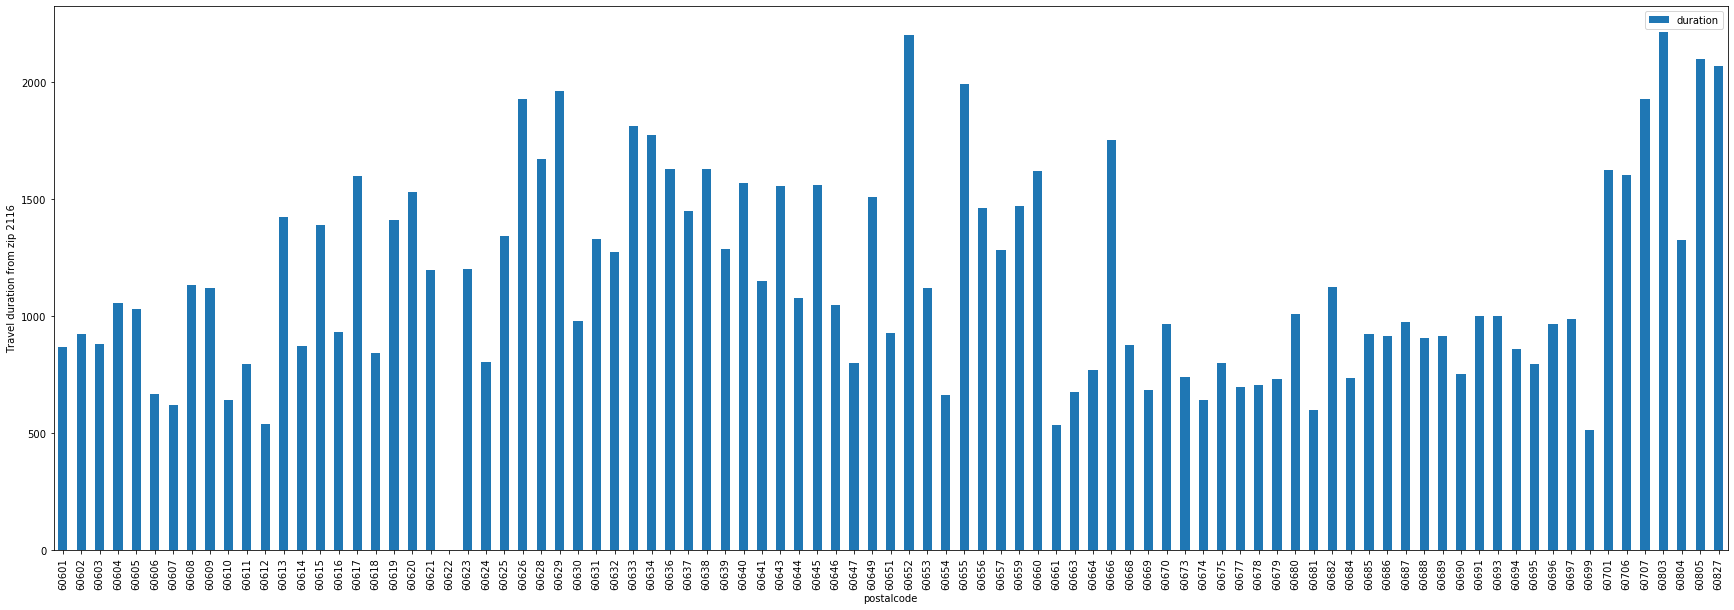

In [13]:
dftime.plot(kind='bar',x='postalcode',y='duration')
plt.rcParams["figure.figsize"] = [30, 10]
plt.ylabel('Travel duration from zip 2116')
plt.show()

#### Merge travel duration time with base Zip code dataframe

In [15]:
dfZip=pd.merge(dfZipr,dftime,on='postalcode')
dfZip.head()

,postalcode,State,City,USCounty,Lattitude,Longitude,lattitude,longitude,duration
0,60601,Chicago,IL,Cook,41.885,-87.626,41.885,-87.626,867
1,60602,Chicago,IL,Cook,41.882,-87.624,41.882,-87.624,921
2,60603,Chicago,IL,Cook,41.880,-87.629,41.880,-87.629,880
3,60604,Chicago,IL,Cook,41.876,-87.626,41.876,-87.626,1054
4,60605,Chicago,IL,Cook,41.866,-87.627,41.866,-87.627,1029


#### Visualize all zip code in Chicago Map using Folium

In [16]:
address = 'Chicago, Illinois,  US, Chicago, US'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago are {}, {}.'.format(latitude, longitude))
map_chicago = folium.Map(location=[latitude, longitude], zoom_start=10)

The geograpical coordinate of Chicago are 41.8966529, -87.6281533.


In [51]:
# create map of New York using latitude and longitude values

# add markers to map
for lat, lng, borough, neighborhood in zip(dfZip['Lattitude'], dfZip['Longitude'], dfZip['USCounty'], dfZip['USCounty']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

#### Lets start identifying venues in each zip code. We will use FourSquare API to gether all venues information for each zip code with in 1KM radius and limit to first 500 venues.

In [ ]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
           
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
# type your answer here
LIMIT=500
radius=1000

chicago_venues = getNearbyVenues(names=dfZip['postalcode'],
                                 latitudes=dfZip['Lattitude'],
                                 longitudes=dfZip['Longitude']
                                  )



60601
60602
60603
60604
60605
60606
60607
60608
60609
60610
60611
60612
60613
60614
60615
60616
60617
60618
60619
60620
60621
60622
60623
60624
60625
60626
60628
60629
60630
60631
60632
60633
60634
60636
60637
60638
60639
60640
60641
60643
60644
60645
60646
60647
60649
60651
60652
60653
60654
60655
60656
60657
60659
60660
60661
60663
60664
60666
60668
60669
60670
60673
60674
60675
60677
60678
60679
60680
60681
60682
60684
60685
60686
60687
60688
60689
60690
60691
60693
60694
60695
60696
60697
60699
60701
60706
60707
60803
60804
60805
60827


In [30]:
print(chicago_venues.shape)
chicago_venues.head()


(3663, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,60601,41.885,-87.626,The Chicago Theatre,41.885539,-87.627151,Theater
1,60601,41.885,-87.626,Chicago Cultural Center,41.883640,-87.624671,Museum
2,60601,41.885,-87.626,sweetgreen,41.884964,-87.624728,Salad Place
3,60601,41.885,-87.626,Intelligentsia Coffee,41.884517,-87.625783,Coffee Shop
4,60601,41.885,-87.626,Virgin Hotels Chicago,41.886065,-87.625853,Hotel


#### No schools information returned from Foursquare api. So lets add schools to the boston_venues dataframe.

In [31]:
addSchools=[]
for i, row in dfSchoolG.iterrows():
    if (dfZip['postalcode']==int(row['postalcode'])).any(axis=0):
        details=[]
        details.append(row['postalcode'])
        details.append(dfZip.loc[dfZip['postalcode']==int(row['postalcode']),'Lattitude'].values[0])
        details.append(dfZip.loc[dfZip['postalcode']==int(row['postalcode']),'Longitude'].values[0])  
        details.append(row['Name'])                             
        details.append(0.00)
        details.append(0.00)
        details.append('School') 
        addSchools.append(details)
    
addSchools

dfschoolvenu=pd.DataFrame(addSchools)
columns=['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Venue','Venue Latitude','Venue Longitude','Venue Category']
dfschoolvenu.columns=columns
dfschoolvenu['Neighborhood']=dfschoolvenu['Neighborhood'].astype(int)
#dfschoolvenu.dtypes

In [32]:
chicago_venues_f=pd.concat([chicago_venues,dfschoolvenu])
chicago_venues_f.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,60601,41.885,-87.626,The Chicago Theatre,41.885539,-87.627151,Theater
1,60601,41.885,-87.626,Chicago Cultural Center,41.883640,-87.624671,Museum
2,60601,41.885,-87.626,sweetgreen,41.884964,-87.624728,Salad Place
3,60601,41.885,-87.626,Intelligentsia Coffee,41.884517,-87.625783,Coffee Shop
4,60601,41.885,-87.626,Virgin Hotels Chicago,41.886065,-87.625853,Hotel


In [33]:
# one hot encoding
chicago_onehot = pd.get_dummies(chicago_venues_f[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chicago_onehot['postalcode'] = chicago_venues_f['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
chicago_onehot = chicago_onehot[fixed_columns]

chicago_onehot.head()
#chicago_onehot[chicago_onehot['postalcode']==60623]

,postalcode,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Board Shop,Boat Rental,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Stadium,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Currency Exchange,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Entertainment Service,Ethiopian Restaurant,Event Space,Exhibit,Factory,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Health & Beauty Service,Heliport,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Rental Service,Resort,Restaurant,River,Road,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Storage Facility,Street Art,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Tour Provider,Toy / Game Store,Trail,Train Station,Transportation Service,Turkish Restaur

#### Analyze the venues data returned along with schools. It appears that Schools tops the list followed by Sandwich shops and coffee shops. 

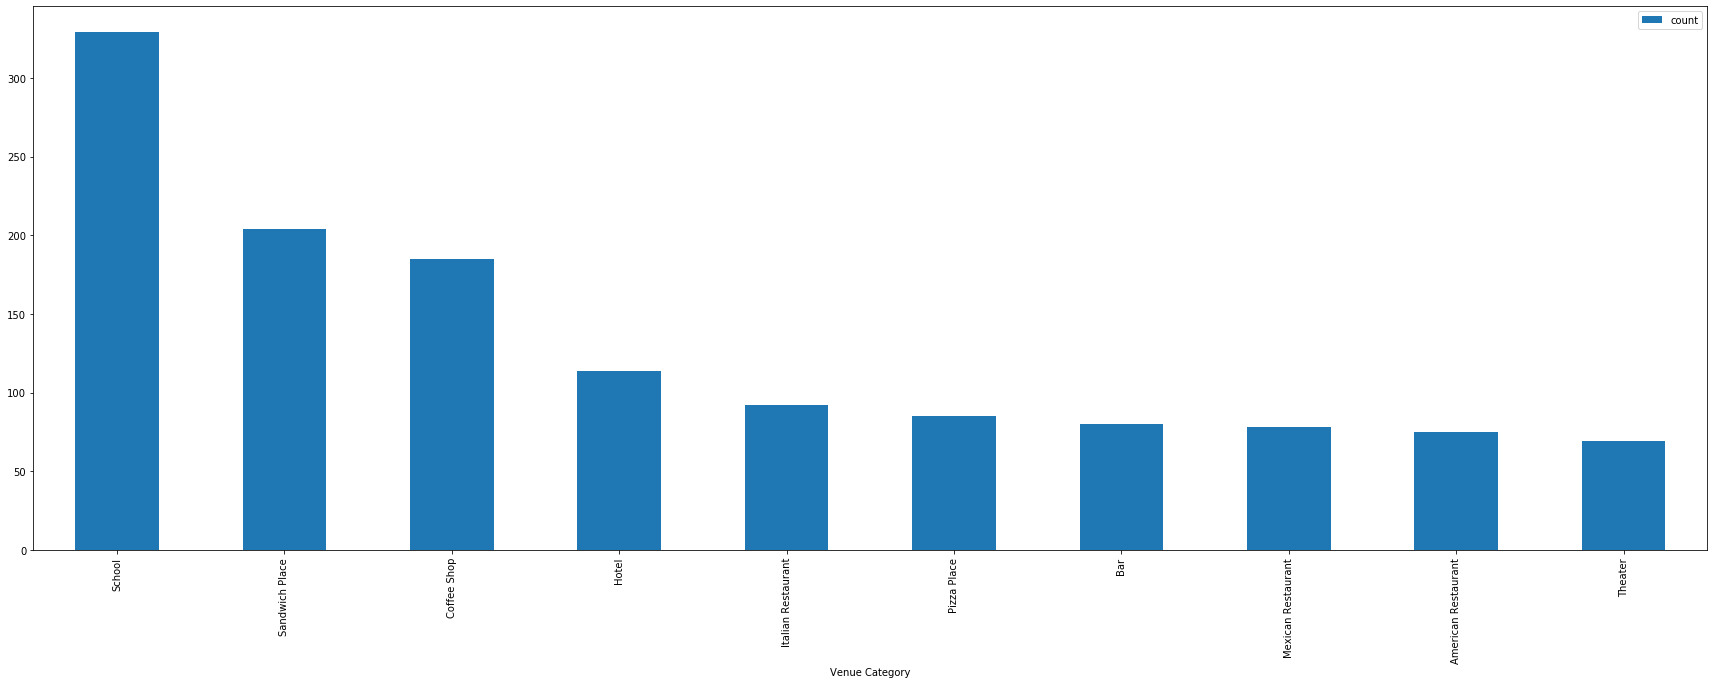

In [34]:
top10venuesR=chicago_venues_f.groupby('Venue Category').count()
top10venues= top10venuesR.sort_values('Venue', ascending=False).reset_index().head(10)
top10venues.drop(columns=['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'],inplace=True)
top10venues.rename(columns={'Venue':'count'},inplace=True)
top10venues.plot(kind='bar',x='Venue Category',y='count')
plt.rcParams["figure.figsize"] = [30, 10]
plt.show()

#### Group Neighbourhoods (Zip Codes)

In [35]:
chicago_grouped = chicago_onehot.groupby('postalcode').mean().reset_index()
#chicago_grouped['postalcode']=chicago_grouped['postalcode'].astype(object)
chicago_grouped.head()
chicago_grouped_school=chicago_grouped[chicago_grouped['School']>0.1].reset_index(drop=True)
#chicago_grouped[chicago_grouped['postalcode']==60623]
chicago_grouped_school.shape

(39, 296)

#### Identify top 5 venues in each Zip Code

In [36]:
num_top_venues = 5

for hood in chicago_grouped['postalcode']:
    print("----"+str(hood)+"----")
    temp = chicago_grouped[chicago_grouped['postalcode'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----60601----
                venue  freq
0               Hotel  0.10
1      Sandwich Place  0.05
2         Coffee Shop  0.05
3             Theater  0.04
4  Seafood Restaurant  0.03


----60602----
                venue  freq
0         Coffee Shop  0.05
1  Italian Restaurant  0.04
2              Bakery  0.04
3             Theater  0.03
4                Park  0.03


----60603----
                venue  freq
0      Sandwich Place  0.08
1         Coffee Shop  0.07
2  Italian Restaurant  0.06
3               Hotel  0.06
4             Theater  0.02


----60604----
            venue  freq
0     Coffee Shop  0.07
1  Sandwich Place  0.05
2     Pizza Place  0.04
3             Pub  0.03
4       Bookstore  0.03


----60605----
            venue  freq
0  Sandwich Place  0.06
1            Park  0.05
2     Coffee Shop  0.04
3     Pizza Place  0.04
4     Bus Station  0.04


----60606----
                           venue  freq
0                 Sandwich Place  0.13
1       Mediterranean Restaurant  0.

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['postalcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
chicago_venues_sorted = pd.DataFrame(columns=columns)
chicago_venues_sorted['postalcode'] = chicago_grouped['postalcode']

for ind in np.arange(chicago_grouped.shape[0]):
    chicago_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

chicago_venues_sorted.head()

,postalcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,60601,Hotel,Coffee Shop,Sandwich Place,Theater,Snack Place,Plaza,Bakery,American Restaurant,Seafood Restaurant,Bar
1,60602,Coffee Shop,Bakery,Italian Restaurant,Park,Museum,Theater,Café,Poke Place,Plaza,Arts & Crafts Store
2,60603,Sandwich Place,Coffee Shop,Italian Restaurant,Hotel,Theater,Café,Salad Place,Taco Place,Mediterranean Restaurant,Asian Restaurant
3,60604,Coffee Shop,Sandwich Place,Pizza Place,Bakery,Bookstore,Hotel,Pub,Concert Hall,Boutique,Dance Studio
4,60605,Sandwich Place,Park,Coffee Shop,Pizza Place,Burger Joint,Bus Station,Dog Run,Gym,Grocery Store,Pharmacy


#### Apply K Means Clustering to all the Zip Codes

In [39]:
# set number of clusters
kclusters = 5

chicago_grouped_clustering = chicago_grouped.drop('postalcode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 2, 4, 0], dtype=int32)

#### Identify all the zip codes where schools top the list in venue count

In [41]:
topschoolvenues=chicago_venues_sorted[chicago_venues_sorted['1st Most Common Venue']=='School']
topschoolvenues.head()
tschoolvenues=chicago_venues_sorted[chicago_venues_sorted['2nd Most Common Venue']=='School']
tschoolvenues.head()
comparedf=pd.merge(topschoolvenues,dfRent,on='postalcode')
comparedf=pd.merge(comparedf,dfSchoolcount,on='postalcode')
comparedf=pd.merge(comparedf,dfZip,on='postalcode')
comparedf.drop(columns={'4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue'},axis=1,inplace=True)
comparedf.head()
comparedf['postalcode']=comparedf['postalcode'].astype(object)
print('Mean Rent' + str(comparedf["Zri"].mean()))
print('Mean Travel Time' + str(comparedf["duration"].mean()))
print('Mean School Coun' + str(comparedf["count"].mean()))

comparedf.head()

Mean Rent1637.7073170731708
Mean Travel Time1318.9268292682927
Mean School Coun7.512195121951219


,postalcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,State_x,Metro,County,City_x,Zri,count,State_y,City_y,USCounty,Lattitude,Longitude,lattitude,longitude,duration
0,60608,School,Mexican Restaurant,Flower Shop,IL,Chicago-Naperville-Elgin,Cook County,Chicago,1724,14,Chicago,IL,Cook,41.849,-87.667,41.849,-87.667,1133
1,60609,School,Arcade,Spanish Restaurant,IL,Chicago-Naperville-Elgin,Cook County,Chicago,1458,10,Chicago,IL,Cook,41.813,-87.654,41.813,-87.654,1120
2,60610,School,Coffee Shop,Yoga Studio,IL,Chicago-Naperville-Elgin,Cook County,Chicago,1917,4,Chicago,IL,Cook,41.899,-87.637,41.899,-87.637,639
3,60612,School,Gas Station,Chinese Restaurant,IL,Chicago-Naperville-Elgin,Cook County,Chicago,1735,7,Chicago,IL,Cook,41.881,-87.687,41.881,-87.687,538
4,60613,School,Bus Station,Park,IL,Chicago-Naperville-Elgin,Cook County,Chicago,1664,6,Chicago,IL,Cook,41.956,-87.661,41.956,-87.661,1422


In [42]:
chicago_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [43]:
comparedfSorted=comparedf.sort_values(by=['count','Zri','duration'], ascending=False).reset_index()

In [44]:
# add clustering labels
chicago_merged = dfZip

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
chicago_merged = chicago_merged.join(chicago_venues_sorted.set_index('postalcode'), on='postalcode')
#chicago_merged['postalcode']=chicago_merged['postalcode'].astype(int)
chicago_merged.head() # check the last columns!

,postalcode,State,City,USCounty,Lattitude,Longitude,lattitude,longitude,duration,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,60601,Chicago,IL,Cook,41.885,-87.626,41.885,-87.626,867,0,Hotel,Coffee Shop,Sandwich Place,Theater,Snack Place,Plaza,Bakery,American Restaurant,Seafood Restaurant,Bar
1,60602,Chicago,IL,Cook,41.882,-87.624,41.882,-87.624,921,0,Coffee Shop,Bakery,Italian Restaurant,Park,Museum,Theater,Café,Poke Place,Plaza,Arts & Crafts Store
2,60603,Chicago,IL,Cook,41.880,-87.629,41.880,-87.629,880,0,Sandwich Place,Coffee Shop,Italian Restaurant,Hotel,Theater,Café,Salad Place,Taco Place,Mediterranean Restaurant,Asian Restaurant
3,60604,Chicago,IL,Cook,41.876,-87.626,41.876,-87.626,1054,0,Coffee Shop,Sandwich Place,Pizza Place,Bakery,Bookstore,Hotel,Pub,Concert Hall,Boutique,Dance Studio
4,60605,Chicago,IL,Cook,41.866,-87.627,41.866,-87.627,1029,0,Sandwich Place,Park,Coffee Shop,Pizza Place,Burger Joint,Bus Station,Dog Run,Gym,Grocery Store,Pharmacy


#### Analyze all the zip codes where schools top in the venue list along with rent and travel duration to work location

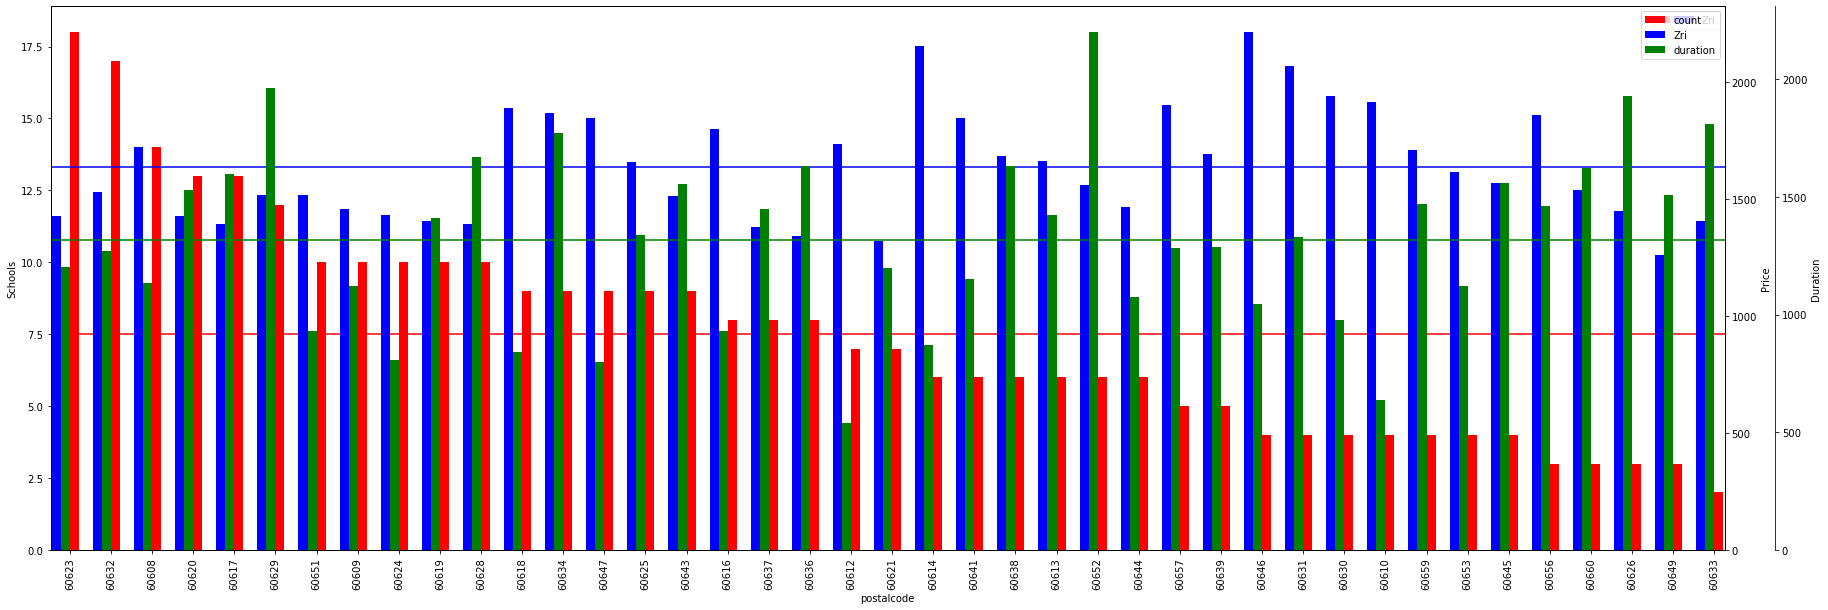

In [46]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx()
ax3 = ax.twinx()
rspine3 = ax3.spines['right']
rspine3.set_position(('axes', 1.03))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)

width = 0.22
comparedfSorted.plot(kind='bar', x='postalcode',y='count',color='red', ax=ax, width=width, position=0)
comparedfSorted.plot(kind='bar',x='postalcode',y='Zri', color='blue', ax=ax2, width=width, position=2)
comparedfSorted.plot(kind='bar', x='postalcode',y='duration',color='green', ax=ax3, width=width, position=1)

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()

meanR = comparedfSorted["Zri"].mean()
ax2.axhline(meanR,color='blue')

meand = comparedfSorted["duration"].mean()
ax3.axhline(meand,color='green')

meand = comparedfSorted["count"].mean()
ax.axhline(meand,color='red')

plt.legend(h1+h2+h3, l1+l2+l3, loc=0)

ax.set_ylabel('Schools')
ax2.set_ylabel('Price')
ax3.set_ylabel('Duration')

plt.savefig('BostonAnalysis.png')
plt.show()

In [35]:
chicago_merged[chicago_merged['1st Most Common Venue']=='School']

,postalcode,State,City,USCounty,Lattitude,Longitude,lattitude,longitude,duration,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,60608,Chicago,IL,Cook,41.849,-87.667,41.849,-87.667,1133,2,School,Mexican Restaurant,Flower Shop,Rental Service,Pizza Place,Park,Supermarket,Grocery Store,Yoga Studio,Event Space
8,60609,Chicago,IL,Cook,41.813,-87.654,41.813,-87.654,1120,4,School,Arcade,Spanish Restaurant,American Restaurant,Electronics Store,Entertainment Service,Ethiopian Restaurant,Event Space,Exhibit,Factory
9,60610,Chicago,IL,Cook,41.899,-87.637,41.899,-87.637,639,0,School,Coffee Shop,Yoga Studio,Gym / Fitness Center,Fast Food Restaurant,Bar,Diner,Deli / Bodega,Restaurant,Sandwich Place
11,60612,Chicago,IL,Cook,41.881,-87.687,41.881,-87.687,538,1,School,Gas Station,Chinese Restaurant,Sandwich Place,Boutique,Bar,Donut Shop,Grocery Store,Fried Chicken Joint,Bank
12,60613,Chicago,IL,Cook,41.956,-87.661,41.956,-87.661,1422,1,School,Bus Station,Park,Convenience Store,Comedy Club,Yoga Studio,Bar,Gas Station,Garden,Snack Place
13,60614,Chicago,IL,Cook,41.924,-87.653,41.924,-87.653,871,0,School,Coffee Shop,Bar,Hot Dog Joint,Sandwich Place,Pizza Place,Japanese Restaurant,Bike Rental / Bike Share,Theater,Thai Restaurant
15,60616,Chicago,IL,Cook,41.845,-87.627,41.845,-87.627,930,1,School,Gym / Fitness Center,Food Truck,Ice Cream Shop,Breakfast Spot,Hotel Bar,Gym,Light Rail Station,Park,Dim Sum Restaurant
16,60617,Chicago,IL,Cook,41.716,-87.554,41.716,-87.554,1599,4,School,Ice Cream Shop,Bowling Alley,Park,Food & Drink Shop,Deli / Bodega,Electronics Store,Currency Exchange,Food,Flower Shop
17,60618,Chicago,IL,Cook,41.944,-87.703,41.944,-87.703,843,1,School,Bus Station,Currency Exchange,Theater,Pub,Supplement Shop,Gas Station,Chinese Restaurant,Korean Restaurant,Gaming Cafe
18,60619,Chicago,IL,Cook,41.746,-87.608,41.746,-87.608,1410,1,School,BBQ Joint,Pizza Place,Donut Shop,Mexican Restaurant,Business Service,Butcher,Boutique,Martial Arts Dojo,Lounge


#### Visualize the zip code clustering using Folium on a map

In [52]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chicago_merged['Lattitude'], chicago_merged['Longitude'], chicago_merged['postalcode'], chicago_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [37]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 0, chicago_merged.columns[[0] + list(range(1, chicago_merged.shape[1]))]]

,postalcode,State,City,USCounty,Lattitude,Longitude,lattitude,longitude,duration,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,60601,Chicago,IL,Cook,41.885,-87.626,41.885,-87.626,867,0,Hotel,Coffee Shop,Sandwich Place,Theater,Snack Place,Plaza,Bakery,American Restaurant,Seafood Restaurant,Bar
1,60602,Chicago,IL,Cook,41.882,-87.624,41.882,-87.624,921,0,Coffee Shop,Bakery,Italian Restaurant,Park,Museum,Theater,Café,Poke Place,Plaza,Arts & Crafts Store
2,60603,Chicago,IL,Cook,41.880,-87.629,41.880,-87.629,880,0,Sandwich Place,Coffee Shop,Italian Restaurant,Hotel,Theater,Café,Salad Place,Taco Place,Mediterranean Restaurant,Asian Restaurant
3,60604,Chicago,IL,Cook,41.876,-87.626,41.876,-87.626,1054,0,Coffee Shop,Sandwich Place,Pizza Place,Bakery,Bookstore,Hotel,Pub,Concert Hall,Boutique,Dance Studio
4,60605,Chicago,IL,Cook,41.866,-87.627,41.866,-87.627,1029,0,Sandwich Place,Park,Coffee Shop,Pizza Place,Burger Joint,Bus Station,Dog Run,Gym,Grocery Store,Pharmacy
5,60606,Chicago,IL,Cook,41.884,-87.638,41.884,-87.638,667,0,Sandwich Place,Coffee Shop,Mediterranean Restaurant,New American Restaurant,Vegetarian / Vegan Restaurant,BBQ Joint,Mexican Restaurant,Italian Restaurant,Vietnamese Restaurant,American Restaurant
6,60607,Chicago,IL,Cook,41.879,-87.651,41.879,-87.651,621,0,Greek Restaurant,School,Coffee Shop,Bar,Sandwich Place,Spa,Café,Gym / Fitness Center,Pizza Place,Grocery Store
9,60610,Chicago,IL,Cook,41.899,-87.637,41.899,-87.637,639,0,School,Coffee Shop,Yoga Studio,Gym / Fitness Center,Fast Food Restaurant,Bar,Diner,Deli / Bodega,Restaurant,Sandwich Place
10,60611,Chicago,IL,Cook,41.894,-87.623,41.894,-87.623,796,0,Hotel,American Restaurant,Clothing Store,New American Restaurant,Italian Restaurant,Pizza Place,Department Store,Donut Shop,Gastropub,Cosmetics Shop
13,60614,Chicago,IL,Cook,41.924,-87.653,41.924,-87.653,871,0,School,Coffee Shop,Bar,Hot Dog Joint,Sandwich Place,Pizza Place,Japanese Restaurant,Bike Rental / Bike Share,Theater,Thai Restaurant


In [38]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 1, chicago_merged.columns[[0] + list(range(1, chicago_merged.shape[1]))]]

,postalcode,State,City,USCounty,Lattitude,Longitude,lattitude,longitude,duration,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,60612,Chicago,IL,Cook,41.881,-87.687,41.881,-87.687,538,1,School,Gas Station,Chinese Restaurant,Sandwich Place,Boutique,Bar,Donut Shop,Grocery Store,Fried Chicken Joint,Bank
12,60613,Chicago,IL,Cook,41.956,-87.661,41.956,-87.661,1422,1,School,Bus Station,Park,Convenience Store,Comedy Club,Yoga Studio,Bar,Gas Station,Garden,Snack Place
15,60616,Chicago,IL,Cook,41.845,-87.627,41.845,-87.627,930,1,School,Gym / Fitness Center,Food Truck,Ice Cream Shop,Breakfast Spot,Hotel Bar,Gym,Light Rail Station,Park,Dim Sum Restaurant
17,60618,Chicago,IL,Cook,41.944,-87.703,41.944,-87.703,843,1,School,Bus Station,Currency Exchange,Theater,Pub,Supplement Shop,Gas Station,Chinese Restaurant,Korean Restaurant,Gaming Cafe
18,60619,Chicago,IL,Cook,41.746,-87.608,41.746,-87.608,1410,1,School,BBQ Joint,Pizza Place,Donut Shop,Mexican Restaurant,Business Service,Butcher,Boutique,Martial Arts Dojo,Lounge
20,60621,Chicago,IL,Cook,41.778,-87.642,41.778,-87.642,1197,1,School,ATM,Coffee Shop,Donut Shop,Sandwich Place,Discount Store,Supermarket,Grocery Store,Intersection,Restaurant
23,60624,Chicago,IL,Cook,41.877,-87.724,41.877,-87.724,805,1,School,Fast Food Restaurant,Shoe Store,Fried Chicken Joint,Clothing Store,Grocery Store,Taco Place,Seafood Restaurant,Sandwich Place,Caribbean Restaurant
24,60625,Chicago,IL,Cook,41.969,-87.704,41.969,-87.704,1340,1,School,Ice Cream Shop,Latin American Restaurant,Mexican Restaurant,Train Station,Grocery Store,Bakery,Park,Discount Store,Donut Shop
31,60633,Chicago,IL,Cook,41.654,-87.559,41.654,-87.559,1812,1,School,Food,Greek Restaurant,Nature Preserve,Factory,Electronics Store,Entertainment Service,Ethiopian Restaurant,Event Space,Exhibit
36,60639,Chicago,IL,Cook,41.918,-87.756,41.918,-87.756,1288,1,School,Mexican Restaurant,Ice Cream Shop,Restaurant,Donut Shop,Sandwich Place,Discount Store,Bus Station,Steakhouse,Fast Food Restaurant


In [39]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 2, chicago_merged.columns[[0] + list(range(1, chicago_merged.shape[1]))]]

,postalcode,State,City,USCounty,Lattitude,Longitude,lattitude,longitude,duration,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,60608,Chicago,IL,Cook,41.849,-87.667,41.849,-87.667,1133,2,School,Mexican Restaurant,Flower Shop,Rental Service,Pizza Place,Park,Supermarket,Grocery Store,Yoga Studio,Event Space
22,60623,Chicago,IL,Cook,41.847,-87.717,41.847,-87.717,1201,2,School,Mexican Restaurant,Bakery,Bank,Clothing Store,Food Truck,Fast Food Restaurant,Supermarket,Liquor Store,Pizza Place
26,60628,Chicago,IL,Cook,41.692,-87.622,41.692,-87.622,1671,2,School,Sandwich Place,Cosmetics Shop,Clothing Store,Steakhouse,Fast Food Restaurant,Fried Chicken Joint,Bus Station,Park,Donut Shop
27,60629,Chicago,IL,Cook,41.778,-87.709,41.778,-87.709,1962,2,School,Liquor Store,Cosmetics Shop,Grocery Store,Middle Eastern Restaurant,Mexican Restaurant,Bus Station,Laundromat,Sandwich Place,Bakery
29,60631,Chicago,IL,Cook,41.989,-87.805,41.989,-87.805,1331,2,School,Park,Bowling Alley,Smoke Shop,Clothing Store,Yoga Studio,Exhibit,Entertainment Service,Ethiopian Restaurant,Event Space
32,60634,Chicago,IL,Cook,41.944,-87.812,41.944,-87.812,1773,2,School,Fast Food Restaurant,Coffee Shop,Tattoo Parlor,Seafood Restaurant,Gourmet Shop,Italian Restaurant,Ice Cream Shop,Pizza Place,Hot Dog Joint
34,60637,Chicago,IL,Cook,41.781,-87.603,41.781,-87.603,1447,2,School,Cosmetics Shop,Diner,Fast Food Restaurant,Sandwich Place,Discount Store,Park,Department Store,Eastern European Restaurant,Flower Shop
35,60638,Chicago,IL,Cook,41.782,-87.774,41.782,-87.774,1630,2,School,Restaurant,Bakery,Pharmacy,Video Store,Home Service,Playground,Record Shop,Dance Studio,Exhibit
38,60641,Chicago,IL,Cook,41.945,-87.746,41.945,-87.746,1150,2,School,Convenience Store,Spa,Fried Chicken Joint,Mexican Restaurant,Fast Food Restaurant,Chinese Restaurant,Martial Arts Dojo,Exhibit,Entertainment Service
41,60645,Chicago,IL,Cook,42.008,-87.706,42.008,-87.706,1558,2,School,Park,Fast Food Restaurant,Playground,Pizza Place,Event Space,Duty-free Shop,Eastern European Restaurant,Electronics Store,Entertainment Service


In [40]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 3, chicago_merged.columns[[0] + list(range(1, chicago_merged.shape[1]))]]

,postalcode,State,City,USCounty,Lattitude,Longitude,lattitude,longitude,duration,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
88,60804,Chicago,IL,Cook,41.843,-87.763,41.843,-87.763,1323,3,Sports Bar,Bar,American Restaurant,Fast Food Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Factory,Falafel Restaurant,Farmers Market


In [41]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 4, chicago_merged.columns[[0] + list(range(1, chicago_merged.shape[1]))]]

,postalcode,State,City,USCounty,Lattitude,Longitude,lattitude,longitude,duration,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,60609,Chicago,IL,Cook,41.813,-87.654,41.813,-87.654,1120,4,School,Arcade,Spanish Restaurant,American Restaurant,Electronics Store,Entertainment Service,Ethiopian Restaurant,Event Space,Exhibit,Factory
16,60617,Chicago,IL,Cook,41.716,-87.554,41.716,-87.554,1599,4,School,Ice Cream Shop,Bowling Alley,Park,Food & Drink Shop,Deli / Bodega,Electronics Store,Currency Exchange,Food,Flower Shop
19,60620,Chicago,IL,Cook,41.742,-87.656,41.742,-87.656,1530,4,School,Discount Store,Currency Exchange,Park,Basketball Court,Yoga Studio,Entertainment Service,Ethiopian Restaurant,Event Space,Exhibit
30,60632,Chicago,IL,Cook,41.809,-87.712,41.809,-87.712,1272,4,School,Bar,Storage Facility,Seafood Restaurant,BBQ Joint,Transportation Service,Home Service,Mexican Restaurant,Italian Restaurant,Fast Food Restaurant
33,60636,Chicago,IL,Cook,41.774,-87.670,41.774,-87.670,1630,4,School,Fried Chicken Joint,Fast Food Restaurant,Yoga Studio,Factory,Electronics Store,Entertainment Service,Ethiopian Restaurant,Event Space,Exhibit
39,60643,Chicago,IL,Cook,41.699,-87.660,41.699,-87.660,1557,4,School,American Restaurant,Cosmetics Shop,Salon / Barbershop,Park,Deli / Bodega,Duty-free Shop,Flower Shop,Flea Market,Fish Market
45,60651,Chicago,IL,Cook,41.900,-87.742,41.900,-87.742,929,4,School,Park,Pizza Place,Flea Market,Food,Deli / Bodega,Department Store,Flower Shop,Currency Exchange,Fish Market
50,60656,Chicago,IL,Cook,41.975,-87.826,41.975,-87.826,1460,4,School,River,Yoga Studio,Factory,Eastern European Restaurant,Electronics Store,Entertainment Service,Ethiopian Restaurant,Event Space,Exhibit
